In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')

In [5]:
data = pd.DataFrame(dict(
    group=['control', 'test'],
    sessions=[1e+6, 1.2e+6],
    clicks=[30_000, 40_000],
))
data

,group,sessions,clicks
0,control,1000000.0,30000
1,test,1200000.0,40000


In [8]:
with pm.Model() as m_binom:
    ctr = pm.Beta('ctr', alpha=1, beta=1, shape=2)

    obs = pm.Binomial('obs', p=ctr, n=data.sessions, observed=data.clicks)
    
    inc = pm.Deterministic('inc', ctr[1] - ctr[0])
    
    m_binom.trace = pm.sample(2000, tune=2000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ctr]
Sampling 2 chains, 0 divergences: 100%|██████████| 8000/8000 [00:05<00:00, 1594.46draws/s]


In [10]:
pm.summary(m_binom.trace, credible_interval=0.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
ctr[0],0.030,0.0,0.030,0.030,0.0,0.0,3057.0,3057.0,3052.0,2614.0,1.0
ctr[1],0.033,0.0,0.033,0.034,0.0,0.0,3652.0,3652.0,3638.0,3020.0,1.0
inc,0.003,0.0,0.003,0.004,0.0,0.0,3473.0,3412.0,3434.0,3011.0,1.0


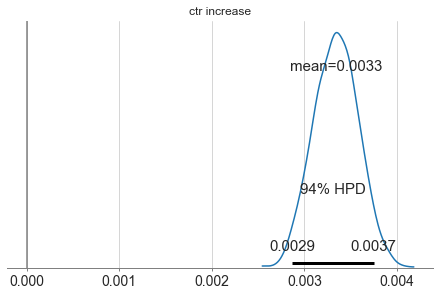

In [15]:
pm.plot_posterior(m_binom.trace['inc'])
plt.axvline(0, color='gray')
plt.gca().set(ylim=(0, None), title='ctr increase')
None